a) Wczytaj zbiór danych MNIST (np. korzystając z biblioteki Tensorflow).

In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
(len(x_train), len(x_test))

(60000, 10000)

b) Wybierz 0.03 danych treningowych oraz 0.01 danych testujących.

In [2]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.utils import resample

sub_size = int(len(x_train) * 0.03)
x_train = x_train.reshape((x_train.shape[0], -1))
x_train, y_train = resample(x_train, y_train, n_samples=sub_size, replace=False, random_state=0)

sub_size = int(len(x_test) * 0.01)
x_test = x_test.reshape((x_test.shape[0], -1))
x_test, y_test = resample(x_test, y_test, n_samples=sub_size, replace=False, random_state=0)
(len(x_train), len(x_test))

(1800, 100)

c) Stwórz klasyfikator k-NN dla zbioru danych.

In [3]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
neigh.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

d) Oblicz accuracy oraz F1 score dla klasyfikatora.

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_pred = neigh.predict(x_test)
(accuracy_score(y_true=y_test, y_pred=y_pred), f1_score(y_true=y_test, y_pred=y_pred, average="macro"))

(0.91, 0.9062990721779556)

e) Dokonaj augumentacji zbioru danych korzystając z różnych funkcji biblioteki imgaug (crop, rotation, gaussian blur, salt and pepper). Porównaj miary jakości.

In [5]:
import imgaug as ia
import imgaug.augmenters as iaa

def augment(images):
    seq = iaa.Sequential(
        [
            iaa.Crop(px=(1, 10), keep_size=True),
            iaa.Sometimes(0.5, iaa.Affine(
                rotate=(-20, 20),
                mode=ia.ALL
            )),
            iaa.SomeOf((1, 2),
                [
                    iaa.GaussianBlur((0, 0.5)),
                    iaa.SaltAndPepper(0.07),
                ],
                random_order=True
            )
        ]
    )
    imagesX = images[:, :, :, np.newaxis]
    images_aug = seq(images=imagesX)
    return [np.squeeze(img) for img in images_aug]

In [13]:
from sklearn.utils import shuffle
x_train = x_train.reshape((x_train.shape[0], 28, 28))
x_train_a = augment(x_train)
y_train_a = y_train

x_train_aug = np.concatenate([x_train, x_train_a])
y_train_aug = np.concatenate([y_train, y_train_a])

x_train_aug, y_train_aug = shuffle(x_train_aug, y_train_aug)

In [7]:
def plot_images(images, n_cols=10):
    n_rows = len(images) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, squeeze=False)
    fig.set_size_inches(20, 2 * n_rows)
  
    for i, img in enumerate(images):
        ax = axes[i // n_cols][i % n_cols]
        ax.imshow(img, cmap='gray', vmin=0, vmax=255)
        ax.set_xticks([]); ax.set_yticks([])

    for i in range(len(images), n_rows * n_cols):
        axes[i // n_cols][i % n_cols].axis('off')

    plt.show()

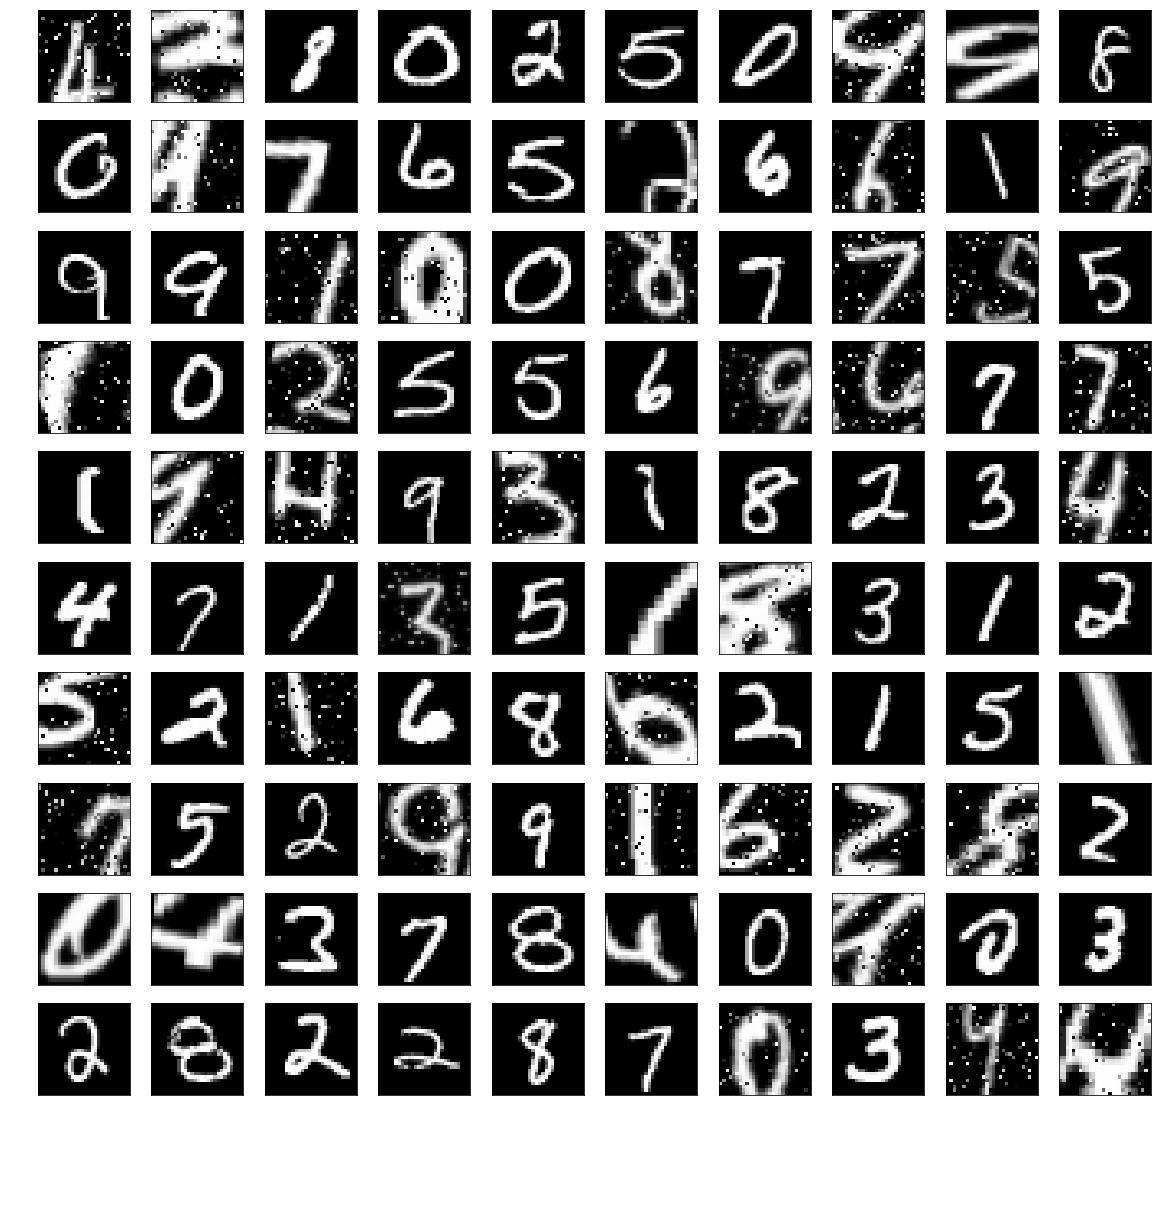

In [9]:
import matplotlib.pyplot as plt
x_train_aug_plt = []
for i in range(100):
    x_train_aug_plt.append(x_train_aug[i].reshape((28,28)))
plot_images(x_train_aug_plt)

In [14]:
x_train_aug = x_train_aug.reshape((x_train_aug.shape[0],-1))
neigh.fit(x_train_aug, y_train_aug)
y_pred = neigh.predict(x_test)
(accuracy_score(y_true=y_test, y_pred=y_pred), f1_score(y_true=y_test, y_pred=y_pred, average="macro"))

(0.9, 0.8947868669333596)

f) Wykonaj kroki a-e dla zbioru danych FMNIST (fashion_mnist).

In [15]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
(len(x_train), len(x_test))

(60000, 10000)

In [16]:
sub_size = int(len(x_train) * 0.03)
x_train = x_train.reshape((x_train.shape[0], -1))
x_train, y_train = resample(x_train, y_train, n_samples=sub_size, replace=False, random_state=0)

sub_size = int(len(x_test) * 0.01)
x_test = x_test.reshape((x_test.shape[0], -1))
x_test, y_test = resample(x_test, y_test, n_samples=sub_size, replace=False, random_state=0)

(len(x_train), len(x_test))

(1800, 100)

In [17]:
neigh = KNeighborsClassifier(n_neighbors=1, algorithm='auto')
neigh.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [18]:
y_pred = neigh.predict(x_test)
(accuracy_score(y_true=y_test, y_pred=y_pred), f1_score(y_true=y_test, y_pred=y_pred, average="macro"))

(0.79, 0.7892562631340301)

In [19]:
x_train = x_train.reshape((x_train.shape[0], 28, 28))
x_train_a = augment(x_train)
y_train_a = y_train

x_train_aug = np.concatenate([x_train, x_train_a])
y_train_aug = np.concatenate([y_train, y_train_a])

x_train_aug, y_train_aug = shuffle(x_train_aug, y_train_aug)

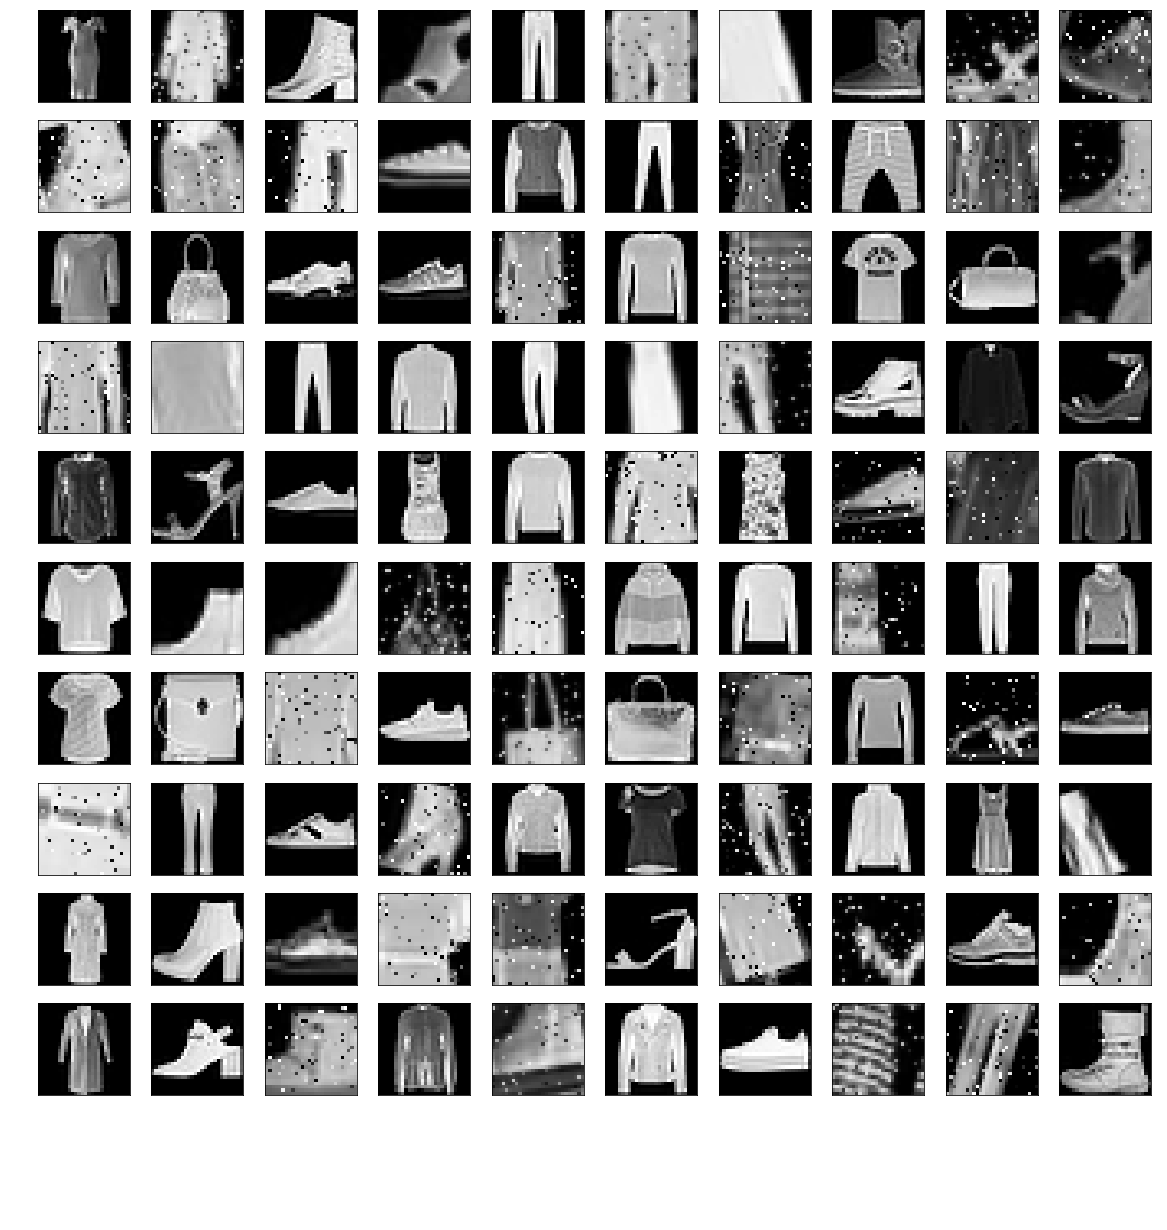

In [20]:
x_train_aug_plt = []
for i in range(100):
    x_train_aug_plt.append(x_train_aug[i].reshape((28,28)))
plot_images(x_train_aug_plt)

In [21]:
x_train_aug = x_train_aug.reshape((x_train_aug.shape[0],-1))
neigh.fit(x_train_aug, y_train_aug)
y_pred = neigh.predict(x_test)
(accuracy_score(y_true=y_test, y_pred=y_pred), f1_score(y_true=y_test, y_pred=y_pred, average="macro"))

(0.8, 0.802218568586855)